Thomas Dougherty

Probability and Statistics for Computer Science


### Analysis of the On-Time Performance (OTP) of New Jersey Transit Commuter Rail<br>
On-time performance refers to the level of success of a service adhering to its schedule. In this example I'll be exploring NJT commuter rail from March 2018 to March 2020. On-time performance data can be used for schedule planning, passenger information systems, and comparison to weather data. 
    

Data cleanup

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from helper_functions import *


#all_services = helper.combine_csvs("data\\services\\")
print("Reading CSV....")
all_services = pd.read_csv('data\\all_services.csv')
all_services = helper.format_services(all_services)

weather = pd.read_csv('data\\weather.csv')
all_services.head(10)

Reading CSV....
Dropping columns...
Changing datatypes...
Done formatting dataframe


,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,line,type
0,2018-03-01,3805,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,Northeast Corrdr,NJ Transit
1,2018-03-01,3805,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133301,Northeast Corrdr,NJ Transit
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187.0,Newark Penn Station,107.0,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116638,Northeast Corrdr,NJ Transit
3,2018-03-01,3805,4.0,Newark Penn Station,107.0,Newark Airport,37953.0,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166626,Northeast Corrdr,NJ Transit
4,2018-03-01,3805,5.0,Newark Airport,37953.0,North Elizabeth,109.0,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166626,Northeast Corrdr,NJ Transit
5,2018-03-01,3805,6.0,North Elizabeth,109.0,Elizabeth,41.0,2018-03-02 01:52:00,2018-03-02 01:52:01,0.016663,Northeast Corrdr,NJ Transit
6,2018-03-01,3805,7.0,Elizabeth,41.0,Linden,70.0,2018-03-02 01:58:00,2018-03-02 01:58:05,0.083313,Northeast Corrdr,NJ Transit
7,2018-03-01,3805,8.0,Linden,70.0,Rahway,127.0,2018-03-02 02:02:00,2018-03-02 02:01:03,0.000000,Northeast Corrdr,NJ Transit
8,2018-03-01,3805,9.0,Rahway,127.0,Metropark,83.0,2018-03-02 02:08:00,2018-03-02 02:08:00,0.000000,Northeast Corrdr,NJ Transit
9,2018-03-01,3805,10.0,Metropark,83.0,Metuchen,84.0,2018-03-02 02:13:00,2018-03-02 02:13:10,0.166626,Northeast Corrdr,NJ Transit


March 2018 - Use with weather data

In [3]:
 #create new dataframe with data broken down by line
mar_2018 = all_services[(all_services['date'].dt.month == 3) & (all_services['date'].dt.year == 2018)]
njt_lines=mar_2018['line'].unique()
# get data for new df columns
max_delays = pd.Series(helper.get_max_delay(mar_2018,njt_lines)).round(3)
avg_delays = pd.Series(helper.get_avg_delay(mar_2018,njt_lines)).round(3)
dates = pd.Series(helper.get_delay_date(mar_2018,njt_lines))
train_ids = pd.Series(helper.get_train_ids(mar_2018,njt_lines))

performance_by_line_march = helper.create_new_dataframe(njt_lines, max_delays, avg_delays, dates)

march_weather = helper.format_weather(weather,'March')
march_weather.head(10)

Formatting weather dataframe...


,STATION,LATITUDE,LONGITUDE,DATE,PRCP,SNOW
0,US1NJMC0040,40.292407,-74.706168,2018-03-01,0.00,0.0
1,US1NJMC0040,40.292407,-74.706168,2018-03-02,1.43,NaN
2,US1NJMC0040,40.292407,-74.706168,2018-03-03,0.72,NaN
3,US1NJMC0040,40.292407,-74.706168,2018-03-04,0.00,0.0
4,US1NJMC0040,40.292407,-74.706168,2018-03-05,0.00,0.0
5,US1NJMC0040,40.292407,-74.706168,2018-03-06,0.00,0.0
6,US1NJMC0040,40.292407,-74.706168,2018-03-08,NaN,NaN
7,US1NJMC0040,40.292407,-74.706168,2018-03-09,0.00,0.0
8,US1NJMC0040,40.292407,-74.706168,2018-03-10,0.00,0.0
9,US1NJMC0040,40.292407,-74.706168,2018-03-11,0.00,0.0


### Visualization of On Time Performance
'On Time' will be defined as a delay of less than 3 minutes. Lateness will be divided into 4 categories.

All Services

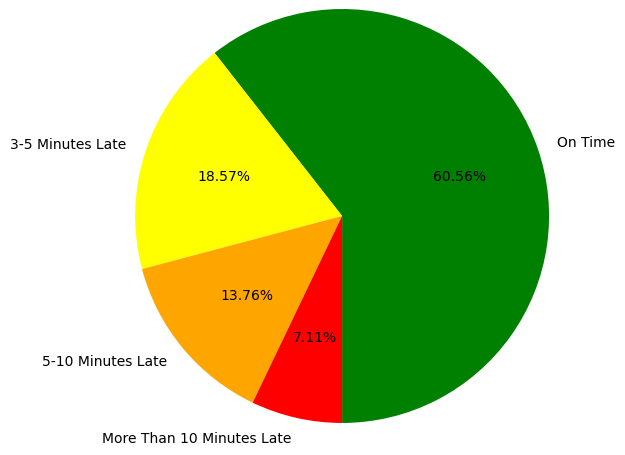

In [6]:
helper.chart_otp(all_services)


